#### Importing necessary libraries


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Loading the first dataset into a dataframe


In [17]:
data = pd.read_csv("GooglePlay.csv")

myDataFrame = pd.DataFrame(data)
printable = myDataFrame.describe(
    include="all",
)
print(printable)

          Unnamed: 0     App Category       Rating       Reviews  \
count   10841.000000   10841    10840  9367.000000  1.084100e+04   
unique           NaN    9660       33          NaN           NaN   
top              NaN  ROBLOX   FAMILY          NaN           NaN   
freq             NaN       9     1972          NaN           NaN   
mean     5420.000000     NaN      NaN     4.191513  4.441119e+05   
std      3129.671468     NaN      NaN     0.515735  2.927629e+06   
min         0.000000     NaN      NaN     1.000000  0.000000e+00   
25%      2710.000000     NaN      NaN     4.000000  3.800000e+01   
50%      5420.000000     NaN      NaN     4.300000  2.094000e+03   
75%      8130.000000     NaN      NaN     4.500000  5.476800e+04   
max     10840.000000     NaN      NaN     5.000000  7.815831e+07   

                      Size    Installs   Type  Price Content Rating Genres  \
count                10841       10841  10840  10841          10841  10840   
unique                 461 

#### Overview of the null/missing values

At first we won't consider zeros as missing


Not considering Zeros as missing values


Unnamed: 0           0
App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


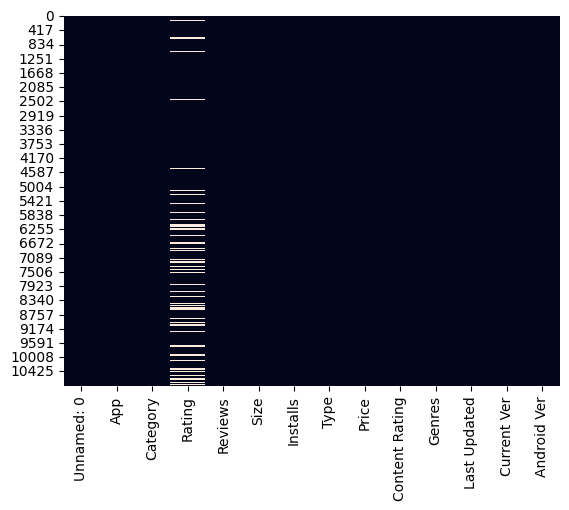

In [18]:
mask = data.isna()
print("Not considering Zeros as missing values")
sns.heatmap(
    mask,
    cbar=False,
)
print(mask.sum())

And now considering zeros as missing values :


Assuming Zeros as missing values
Unnamed: 0            1
App                   0
Category              1
Rating             1474
Reviews             596
Size                  0
Installs              1
Type                  1
Price             10041
Content Rating        0
Genres                1
Last Updated          0
Current Ver           8
Android Ver           2
dtype: int64
Price column Null values : 0


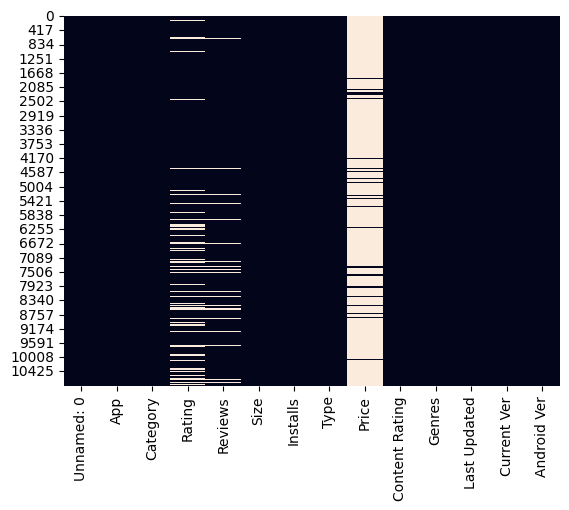

In [19]:
print("Assuming Zeros as missing values")
mask = (mask) | (
    data.isin(
        [
            "0",
            "0.0",
            "0.00",
            "0.000",
            0,
            0.0,
        ]
    )
)
sns.heatmap(mask, cbar=False)
print(mask.sum())
print("Price column Null values :", data["Price"].isnull().sum())

**Creating the output dataframe**


In [20]:
columns = [
    "Unnamed: 0",
    "App",
    "Category",
    "Rating",
    "Reviews",
    "Size",
    "Installs",
    "Type",
    "Price",
    "Content Rating",
    "Genres",
    "Last Updated",
    "Current Ver",
    "Android Ver",
]
out_format = [
    "RecCount",
    "NullCount",
    "Accuracy",
    "Completeness",
    "Currentness",
    "Validity",
    "Consistency",
]


out_df = pd.DataFrame(columns=out_format, index=columns)
print(out_df)

               RecCount NullCount Accuracy Completeness Currentness Validity  \
Unnamed: 0          NaN       NaN      NaN          NaN         NaN      NaN   
App                 NaN       NaN      NaN          NaN         NaN      NaN   
Category            NaN       NaN      NaN          NaN         NaN      NaN   
Rating              NaN       NaN      NaN          NaN         NaN      NaN   
Reviews             NaN       NaN      NaN          NaN         NaN      NaN   
Size                NaN       NaN      NaN          NaN         NaN      NaN   
Installs            NaN       NaN      NaN          NaN         NaN      NaN   
Type                NaN       NaN      NaN          NaN         NaN      NaN   
Price               NaN       NaN      NaN          NaN         NaN      NaN   
Content Rating      NaN       NaN      NaN          NaN         NaN      NaN   
Genres              NaN       NaN      NaN          NaN         NaN      NaN   
Last Updated        NaN       NaN      N

#### RecCount and Null count


In [21]:
def rec_count(data: pd.DataFrame, column):
    return len(data[column])


def null_count(data: pd.DataFrame, column):
    return (data[column].isnull()).sum()


def zero_count(data: pd.DataFrame, column):
    return data[column].isin(["0", "0.0", "0.00", "0.000", 0, 0.0]).sum()

Calculating the RecCount and Null count columns


In [22]:
for column in columns:
    out_df.loc[column, "RecCount"] = rec_count(data, column)
    out_df.loc[column, "NullCount"] = null_count(data, column)
print(out_df)

               RecCount NullCount Accuracy Completeness Currentness Validity  \
Unnamed: 0        10841         0      NaN          NaN         NaN      NaN   
App               10841         0      NaN          NaN         NaN      NaN   
Category          10841         1      NaN          NaN         NaN      NaN   
Rating            10841      1474      NaN          NaN         NaN      NaN   
Reviews           10841         0      NaN          NaN         NaN      NaN   
Size              10841         0      NaN          NaN         NaN      NaN   
Installs          10841         0      NaN          NaN         NaN      NaN   
Type              10841         1      NaN          NaN         NaN      NaN   
Price             10841         0      NaN          NaN         NaN      NaN   
Content Rating    10841         0      NaN          NaN         NaN      NaN   
Genres            10841         1      NaN          NaN         NaN      NaN   
Last Updated      10841         0      N

#### Consistentcy

Finding mismatches


In [23]:
def consisteny_check(data: pd.DataFrame):
    price_consistency = 0
    genre_consistency = 0
    reviews_inconsistency = 0
    for index, row in data.iterrows():
        # cast price to float to check
        # print(index)
        row["Price"] = row["Price"].replace("$", "")
        row["Price"] = float(row["Price"])

        if row["Price"] == 0 and row["Type"] == "Free":
            price_consistency += 1
        elif row["Price"] > 0 and row["Type"] == "Paid":
            price_consistency += 1
        # convert category to a set of genres
        try:
            row["Category"] = {row["Category"].upper()}

        except AttributeError:
            print("cat=", row["Category"])
            print(index)
            continue
        try:
            row["Genres"] = set(
                row["Genres"].upper().replace("&", "AND").replace(" ", "_").split(";")
            )
        except AttributeError:
            print("genre=", row["Genres"])
            print(index)
            continue
        # check for game and family sub genres
        if row["Category"].intersection(row["Genres"]):
            genre_consistency += 1

    # check for reviews
    reviews_inconsistency = myDataFrame.loc[
        myDataFrame["Rating"].isnull() & myDataFrame["Reviews"] != 0
    ].shape[0]
    return price_consistency, genre_consistency, reviews_inconsistency

In [24]:
price_consistency, genre_consistency, reviews_inconsistency = consisteny_check(
    myDataFrame
)


print("Price Consistency: ", price_consistency)


print("Genre Consistency: ", genre_consistency)
print("Reviews Inconsistency: ", reviews_inconsistency)


out_df.loc["Price", "Consistency"] = (
    price_consistency * 100 / out_df.loc["Price", "RecCount"]
)


out_df.loc["Genres", "Consistency"] = (
    genre_consistency * 100 / out_df.loc["Genres", "RecCount"]
)


out_df.loc["Type", "Consistency"] = out_df.loc["Price", "Consistency"]


out_df.loc["Category", "Consistency"] = out_df.loc["Genres", "Consistency"]
out_df.loc["Reviews", "Consistency"] = (
    (out_df.loc["Reviews", "RecCount"] - reviews_inconsistency) * 100
) / out_df.loc["Reviews", "RecCount"]
out_df.loc["Rating", "Consistency"] = out_df.loc["Reviews", "Consistency"]


print(out_df[["Consistency"]])

cat= nan
10472
Price Consistency:  10840
Genre Consistency:  7549
Reviews Inconsistency:  506
               Consistency
Unnamed: 0             NaN
App                    NaN
Category         69.633798
Rating           95.332534
Reviews          95.332534
Size                   NaN
Installs               NaN
Type             99.990776
Price            99.990776
Content Rating         NaN
Genres           69.633798
Last Updated           NaN
Current Ver            NaN
Android Ver            NaN


#### Currentness

Data before 2018 is considered outdated


In [25]:
def currentness_check(data: pd.DataFrame):
    last_updated = 0
    for index, row in data.iterrows():
        if int(row["Last Updated"][-2:]) > 17:
            last_updated += 1
    return last_updated

In [26]:
last_updated = currentness_check(myDataFrame)
print("Last Updated: ", last_updated)
out_df["Currentness"] = last_updated * 100 / out_df.loc["Last Updated", "RecCount"]
print(out_df[["Currentness"]])

Last Updated:  7350
                Currentness
Unnamed: 0        67.798174
App               67.798174
Category          67.798174
Rating            67.798174
Reviews           67.798174
Size              67.798174
Installs          67.798174
Type              67.798174
Price             67.798174
Content Rating    67.798174
Genres            67.798174
Last Updated      67.798174
Current Ver       67.798174
Android Ver       67.798174


#### Validity


First the ones without procedural code
Check invalidity in the data["Contetent Rating"] and data["Android Ver"] and data["Current Ver"] and data["Genres"]


In [27]:
print("Android Ver = ", myDataFrame["Android Ver"].unique())
print("-------------------")
print("Current Ver = ", myDataFrame["Current Ver"].unique())
print("-------------------")
print("Content Rating = ", myDataFrame["Content Rating"].unique())
print("-------------------")
print("Genres = ", myDataFrame["Genres"].unique())
print("-------------------")
print("last_updated = ", myDataFrame["Last Updated"].unique())
print("-------------------")

Android Ver =  ['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']
-------------------
Current Ver =  ['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']
-------------------
Content Rating =  ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
-------------------
Genres =  ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Educ

In [40]:
def is_castable_to_float(obj):

    try:
        float(obj)

        return True

    except:

        return False


def installs_formating(obj):
    obj = obj.replace("+", "")
    obj = obj.replace(",", "")
    return int(obj)


def is_installs_format(obj):
    try:
        installs_formating(obj)
        return True
    except:
        return False


def is_rating_format(obj):
    return is_castable_to_float(obj) and 0 <= float(obj) <= 5


def is_castable_to_int(obj):

    try:
        int(obj)

        return True

    except:

        return False


def size_formatting(obj):

    if obj == "Varies with device":

        return 1

    obj = obj[0:-1]
    return float(obj)


def is_size_format(obj):

    try:

        size_formatting(obj)

        return True

    except:

        return False


def is_category_format(obj):
    try:
        if re.match(r"^[A-Z]+[_A-Z]*$", obj) is not None:
            return True
        return False

    except:
        return False


def is_type_format(obj):
    return obj in ["Free", "Paid"]


def price_formatting(obj):
    obj = obj.replace("$", "")
    return float(obj)


def is_price_format(obj):
    try:
        obj = price_formatting(obj)
        return is_castable_to_float(obj) and float(obj) >= 0
    except:
        return False


def is_genre_format(obj):
    try:
        if re.match(r"^[A-Za-z\s&;]+$", obj) is not None:
            return True
        return False
    except:
        return False


def is_content_rating_format(obj):
    try:
        if obj in ["Everyone", "Teen", "Mature 17+", "Adults only 18+", "Unrated"]:
            return True
        return False
    except:
        return False


def is_last_update_format(obj):
    try:
        if (
            re.match(
                r"\b(0?[1-9]|[12]\d|3[01])-(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-\d{2}\b",
                obj,
            )
            is not None
        ):
            return True
        return False
    except:
        return False


def is_current_ver_format(obj):
    try:
        if (
            re.match(
                r"^\d+(\.\d+){2}$",
                obj,
            )
            is not None
        ):
            return True
        return False
    except:
        return False


def is_android_ver_format(obj):
    try:
        if (
            re.match(
                r"^\d+(\.\d+)?(\.\d+)?(?: - \d+(\.\d+)?){0,1} and up$",
                obj,
            )
            is not None
        ):
            return True
        return False
    except:
        return False

In [41]:
def validity_check(data: pd.DataFrame):
    out = {}
    out["Rating"] = (data["Rating"].apply(is_rating_format)).sum()
    out["Reviews"] = (data["Reviews"].apply(is_castable_to_int)).sum()
    out["Size"] = (data["Size"].apply(is_size_format)).sum()
    out["Installs"] = (data["Installs"].apply(is_installs_format)).sum()
    out["Type"] = (data["Type"].apply(is_type_format)).sum()
    out["Price"] = (data["Price"].apply(is_price_format)).sum()
    out["Category"] = (data["Category"].apply(is_category_format)).sum()
    out["Genres"] = (data["Genres"].apply(is_genre_format)).sum()
    out["Android Ver"] = (data["Android Ver"].apply(is_android_ver_format)).sum()
    out["Last Updated"] = (data["Last Updated"].apply(is_last_update_format)).sum()
    out["Current Ver"] = (data["Current Ver"].apply(is_current_ver_format)).sum()
    out["Content Rating"] = (
        data["Content Rating"].apply(is_content_rating_format)
    ).sum()

    return out

In [42]:
valid_count = validity_check(myDataFrame)
print(valid_count)

{'Rating': 9367, 'Reviews': 10841, 'Size': 10841, 'Installs': 10841, 'Type': 10840, 'Price': 10841, 'Category': 10840, 'Genres': 10840, 'Android Ver': 9456, 'Last Updated': 10841, 'Current Ver': 4852, 'Content Rating': 10427}


In [34]:
for key in valid_count.keys():
    out_df.loc[key, "Validity"] = valid_count[key] * 100 / out_df.loc[key, "RecCount"]

#### Completeness

checking for null values for each column


In [35]:
def completeness_check(data: pd.DataFrame):
    out = {}
    total_rec = len(data)
    for col in data.columns:
        out[col] = data[col].isna().sum()

    return out

In [36]:
incomplete_count = completeness_check(myDataFrame)
for key in incomplete_count.keys():
    out_df.loc[key, "Completeness"] = (
        (out_df.loc[key, "RecCount"] - incomplete_count[key])
        * 100
        / out_df.loc[key, "RecCount"]
    )
print(out_df[["Completeness"]])

               Completeness
Unnamed: 0            100.0
App                   100.0
Category          99.990776
Rating            86.403468
Reviews               100.0
Size                  100.0
Installs              100.0
Type              99.990776
Price                 100.0
Content Rating        100.0
Genres            99.990776
Last Updated          100.0
Current Ver       99.926206
Android Ver       99.981552


#### Accuracy

Data is accurate if its both complete and valid


In [37]:
# def accuracy_checking(data: pd.DataFrame):
#     out = {}
#     data["Reviews"] = data["Reviews"].apply(int)
#     Q1 = data["Reviews"].quantile(0.25)
#     Q3 = data["Reviews"].quantile(0.75)
#     IQR = Q3 - Q1
#     out["Reviews"] = data[
#         ((data["Reviews"] > (Q1 - 1.5 * IQR))) & (data["Reviews"] < (Q3 + 1.5 * IQR))
#     ].count()

#     data["Rating"] = data["Rating"].apply(float)
#     Q1 = data["Rating"].quantile(0.25)
#     Q3 = data["Rating"].quantile(0.75)
#     IQR = Q3 - Q1
#     out["Rating"] = data[
#         ((data["Rating"] > (Q1 - 1.5 * IQR))) & (data["Rating"] < (Q3 + 1.5 * IQR))
#     ].count()

#     data["Size"] = data["Size"].apply(size_formatting)
#     Q1 = data["Size"].quantile(0.25)
#     Q3 = data["Size"].quantile(0.75)
#     IQR = Q3 - Q1
#     out["Size"] = data[
#         ((data["Size"] > (Q1 - 1.5 * IQR))) & (data["Size"] < (Q3 + 1.5 * IQR))
#     ].count()

#     data["Installs"] = data["Installs"].apply(installs_formating)
#     Q1 = data["Installs"].quantile(0.25)
#     Q3 = data["Installs"].quantile(0.75)
#     IQR = Q3 - Q1
#     out["Installs"] = data[
#         ((data["Installs"] > (Q1 - 1.5 * IQR))) & (data["Installs"] < (Q3 + 1.5 * IQR))
#     ].count()

#     data["Price"] = data["Price"].apply(price_formatting)
#     Q1 = data["Price"].quantile(0.25)
#     Q3 = data["Price"].quantile(0.75)
#     IQR = Q3 - Q1
#     out["Price"] = data[
#         (data["Price"] > (Q1 - 1.5 * IQR)) & (data["Price"] < (Q3 + 1.5 * IQR))
#     ].count()

#     return out


def accuracy_check(data):
    out = {}
    comp = completeness_check(data)
    vald = validity_check(data)
    for key in vald.keys():
        out[key] = vald[key] - comp[key]

    return out

In [38]:
accuracy_check = accuracy_check(myDataFrame)
print(accuracy_check)
out_df["Accuracy"] = out_df["Validity"]
for key in accuracy_check.keys():
    out_df.loc[key, "Accuracy"] = (
        accuracy_check[key] * 100 / out_df.loc[key, "RecCount"]
    )

{'Rating': 7893, 'Reviews': 10841, 'Size': 10841, 'Installs': 10841, 'Type': 10839, 'Price': 10841, 'Category': 10839, 'Genres': 10839, 'Android Ver': 9454, 'Last Updated': 10841, 'Current Ver': 4844, 'Content Rating': 10427}


#### Final Result


In [39]:
out_df

,RecCount,NullCount,Accuracy,Completeness,Currentness,Validity,Consistency
Unnamed: 0,10841,0,NaN,100.0,67.798174,NaN,NaN
App,10841,0,NaN,100.0,67.798174,NaN,NaN
Category,10841,1,99.981552,99.990776,67.798174,99.990776,69.633798
Rating,10841,1474,72.806937,86.403468,67.798174,86.403468,95.332534
Reviews,10841,0,100.0,100.0,67.798174,100.0,95.332534
Size,10841,0,100.0,100.0,67.798174,100.0,NaN
Installs,10841,0,100.0,100.0,67.798174,100.0,NaN
Type,10841,1,99.981552,99.990776,67.798174,99.990776,99.990776
Price,10841,0,100.0,100.0,67.798174,100.0,99.990776
Content Rating,10841,0,96.181164,100.0,67.798174,96.181164,NaN
